## Perform the following operations using Python on Hepatitis dataset.
### q. Data cleaning(Remove NA, ?, Negative values etc.)
### r. Error correcting(Outlier detection and removal)
### s. Data transformation
### t. Build Data model using regression and Naïve Bayes methods for prediction class DIE, LIVE and compare accuracy Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("hepatitis.csv", header=0)
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


## DATA CLEANING

In [4]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert all numeric columns properly
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Remove negative values from columns where it doesn't make sense
non_negative_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
for col in non_negative_cols:
    df = df[df[col] >= 0]

print("Cleaned Data:\n")
df.head()

Cleaned Data:



,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


## ERROR CORRECTING

In [5]:
# Convert class values: 1 = LIVE, 2 = DIE
df['class'] = df['class'].map({1: 'LIVE', 2: 'DIE'})

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0 = DIE, 1 = LIVE

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## MODEL BUILDING

In [6]:
# Split dataset into training & testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# --- Logistic Regression ---
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# --- Naive Bayes ---
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

## COMPARING MODEL PERFORMANCE

In [7]:
print("\n📊 --- Logistic Regression ---")
print("Accuracy:", acc_lr)
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

print("\n📊 --- Naive Bayes ---")
print("Accuracy:", acc_nb)
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

print("\n📊 --- Confusion Matrices ---")
print("Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))
print("Naive Bayes:\n", confusion_matrix(y_test, y_pred_nb))


📊 --- Logistic Regression ---
Accuracy: 0.8620689655172413
              precision    recall  f1-score   support

         DIE       0.96      0.88      0.92        26
        LIVE       0.40      0.67      0.50         3

    accuracy                           0.86        29
   macro avg       0.68      0.78      0.71        29
weighted avg       0.90      0.86      0.88        29


📊 --- Naive Bayes ---
Accuracy: 0.6551724137931034
              precision    recall  f1-score   support

         DIE       0.94      0.65      0.77        26
        LIVE       0.18      0.67      0.29         3

    accuracy                           0.66        29
   macro avg       0.56      0.66      0.53        29
weighted avg       0.87      0.66      0.72        29


📊 --- Confusion Matrices ---
Logistic Regression:
 [[23  3]
 [ 1  2]]
Naive Bayes:
 [[17  9]
 [ 1  2]]


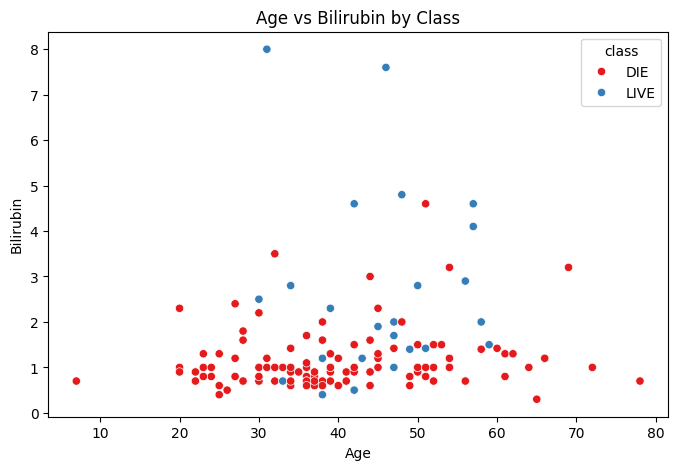

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='bilirubin', hue='class', data=df, palette='Set1')
plt.title('Age vs Bilirubin by Class')
plt.xlabel('Age')
plt.ylabel('Bilirubin')
plt.show()